In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv('HousingData.csv')

### Data cleaning and exploration

In [2]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
train_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
train_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
y = train_data['MEDV']
X_features = train_data.drop('MEDV',axis=1)

### Making Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [8]:
num_pipeline = Pipeline([
                        ("imputer",SimpleImputer(strategy='median')),
                        ("scaler",StandardScaler())
])

In [9]:
cols = []
for i in X_features.columns:    #gives all the columns
    cols.append(i)

In [10]:
from sklearn.compose import ColumnTransformer
preprocess_pipeline = ColumnTransformer([('cols',num_pipeline,cols)])

In [11]:
X_processed = preprocess_pipeline.fit_transform(X_features)

### If we split the dataset (more practical)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_processed,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_lin_reg = lin_reg.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_lin_reg)
mse

33.62385924979581

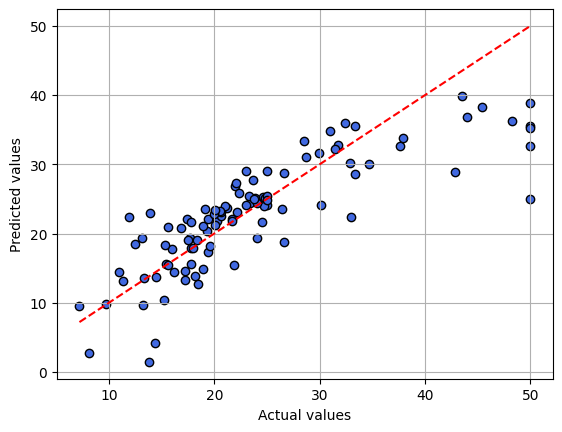

In [16]:
plt.scatter(y_test,y_lin_reg, color='royalblue', edgecolor='k')    #plots the predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') #gives the ideal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

### If we do not split the dataset

In [17]:
lin_reg.fit(X_processed,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_lin_full = lin_reg.predict(X_processed)

In [19]:
mse2 = mean_squared_error(y,y_lin_full)
mse2

22.62122299256974

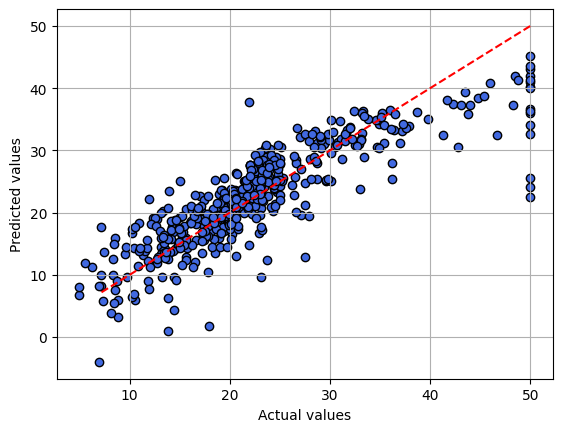

In [22]:
plt.scatter(y,y_lin_full, color='royalblue', edgecolor='k')    #plots the predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') #gives the ideal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

### Gradient Descent

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000,tol=1e-5,penalty=None, eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X_processed,y)

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,1e-05
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [24]:
y_sgd = sgd_reg.predict(X_processed)

In [25]:
mse_sgd = mean_squared_error(y,y_sgd)
mse_sgd

22.624852923243637